In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.drop(columns=['customerID'],inplace=True,axis=1)

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h1>Exploratory Data Analysis</h1>

In [8]:
# Defining bar chart function
def bar(feature, df=df):
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        margin=dict(r=400),
    )

    return fig.show()

In [9]:
bar('gender')

df.loc[df.SeniorCitizen==0,'SeniorCitizen'] = "No"  
df.loc[df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  
bar('SeniorCitizen')
bar('Partner')
bar('Dependents')

In [10]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

In [11]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

In [12]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
try:
    df['TotalCharges'] = df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ' '


In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [15]:
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

df['Churn'] = df[['Churn']].apply(binary_map)

df['gender'] = df['gender'].map({'Male':1, 'Female':0})

binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_list] = df[binary_list].apply(binary_map)

data_df = pd.get_dummies(df, drop_first=True)

In [16]:
data_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
corr = data_df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [18]:
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]

data_df.columns = all_columns

print(data_df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No_internet_service', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_service', 'StreamingMovies_Yes',
       'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Credit_card__automatic_',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check'],
      dtype='object')


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Fri, 12 Apr 2024   Deviance:                       5829.3
Time:                        00:05:45   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2807
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [20]:
np.exp(res.params)

Intercept                                        2.287343
MultipleLines_No_phone_service[T.True]           1.382358
MultipleLines_Yes[T.True]                        1.563475
InternetService_Fiber_optic[T.True]              5.771657
InternetService_No[T.True]                       0.774257
OnlineSecurity_No_internet_service[T.True]       0.774257
OnlineSecurity_Yes[T.True]                       0.814269
OnlineBackup_No_internet_service[T.True]         0.774257
OnlineBackup_Yes[T.True]                         1.026127
DeviceProtection_No_internet_service[T.True]     0.774257
DeviceProtection_Yes[T.True]                     1.159152
TechSupport_No_internet_service[T.True]          0.774257
TechSupport_Yes[T.True]                          0.836193
StreamingTV_No_internet_service[T.True]          0.774257
StreamingTV_Yes[T.True]                          1.806134
StreamingMovies_No_internet_service[T.True]      0.774257
StreamingMovies_Yes[T.True]                      1.829067
Contract_One_y

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_df['tenure'] = sc.fit_transform(data_df[['tenure']])
data_df['MonthlyCharges'] = sc.fit_transform(data_df[['MonthlyCharges']])
data_df['TotalCharges'] = sc.fit_transform(data_df[['TotalCharges']])

<h1>Training</h1>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
X = data_df.drop('Churn', axis=1)
y = data_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [23]:
def modeling(alg, alg_name, params={}):
    model = alg(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [24]:
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7983909133932797
precision:  0.6281800391389433
recall:  0.5763016157989228
f1_score:  0.7955174819104321


In [25]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

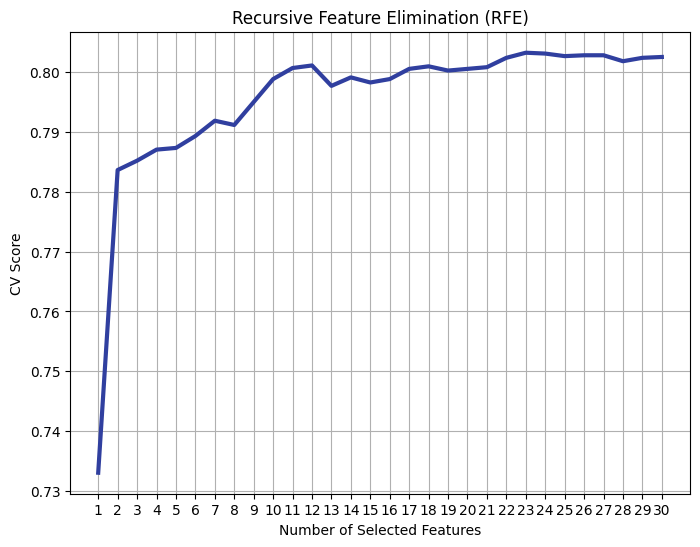

The optimal number of features: 23


In [26]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], color='#303F9F', linewidth=3)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [27]:
X_rfe = X.iloc[:, rfecv.support_]

# Overview of the optimal features in comparison with the initial dataframe
print("X dimension: {}".format(X.shape))
print("X column list:", X.columns.tolist())
print("X_rfe dimension: {}".format(X_rfe.shape))
print("X_rfe column list:", X_rfe.columns.tolist())


X dimension: (7043, 30)
X column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
X_rfe dimension: (7043, 23)
X_rfe column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'Internet

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)  

In [29]:
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

Logistic Regression Classification
accuracy:  0.8017037387600567
precision:  0.6374501992031872
recall:  0.5745062836624776
f1_score:  0.7982762676502377


In [30]:
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.7993374349266446
precision:  0.6494382022471911
recall:  0.518850987432675
f1_score:  0.7916082146150322


In [31]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7832465688594415
precision:  0.6042105263157894
recall:  0.5152603231597845
f1_score:  0.7774176109650485


In [32]:
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7292948414576431
precision:  0.4873524451939292
recall:  0.518850987432675
f1_score:  0.731947865270711


In [33]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6540463795551349
precision:  0.4257679180887372
recall:  0.895870736086176
f1_score:  0.6729702812977834


<h1>Optimisation</h1>

In [34]:
model = LogisticRegression()

from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['C'] = loguniform(1e-5, 1000)

# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

result = search.fit(X_rfe, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Best Score: 0.8045796394799054
Best Hyperparameters: {'C': 105.9106152996689, 'solver': 'lbfgs'}


In [35]:
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', params=result.best_params_)

Logistic Regression Classification
accuracy:  0.8031235210601041
precision:  0.6407185628742516
recall:  0.5763016157989228
f1_score:  0.7996532493520713


<h1>Saving the Model</h1>

In [36]:
import joblib
filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']